In [2]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
import itertools
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import set_matplotlib_formats
import matplotlib.cm as cm
%matplotlib inline
#from matplotlib import cm

In [3]:
# function for fitting with relation to T_in and T_out
# x=T_in, y=T_out, z= size to fit

def fit_simple(x,y,z):
    p0=[0.1,0.001,1.] # starting values
    a=(x,y,z) 
    para,_ = scipy.optimize.leastsq(func_simple_zero,p0,args=a)
    return para

def func_simple_zero(para, x, y, z):
    k1,k2,k3 = para
    z_calc = k1*x + k2*y + k3
    z_diff = z_calc - z
    return z_diff

# Function to calculate z using parameters and any x and y:
def func_simple(para, x, y):
    k1,k2,k3 = para
    z = k1*x + k2*y + k3
    return z

In [4]:
data_keymark = pd.read_csv('hplib-database_heating.csv', delimiter=',')
data_keymark = data_keymark.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
Models=data_keymark['Model'].values.tolist()
Models = list(dict.fromkeys(Models))
K = 273.15
eta_carnot_key = (data_keymark['T_out']+K) / ((data_keymark['T_out']+K)-(data_keymark['T_in']+K))
data_keymark['eta'] = data_keymark['COP'] / eta_carnot_key
data_keymark.fillna(0, inplace=True)
paradf = pd.read_csv('para.csv', delimiter=',')

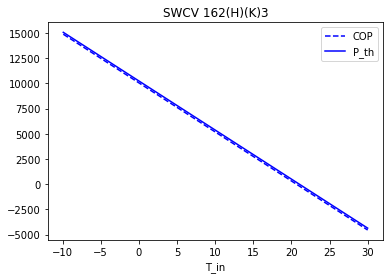

In [4]:
data_ref = pd.read_csv(r'validation\AIT_SWCV_122\ait-SWCV-diagramm.csv', delimiter=',', decimal=',')
data_ref.drop(['P_el','P_th'], axis=1)
k1=[]
k2=[]
k3=[]
k4=[]
k5=[]
k6=[]
k7=[]
k8=[]
k9=[]

for model in Models:
    if model=='SWCV 162(H)(K)3':
        data_key = pd.read_csv('hplib-database_heating.csv', delimiter=',')
        data_key = data_key.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
        data_key = data_key.loc[data_key['Model'] == model]
        #temp=['cold', 'average', 'warm']
        
        data_key = data_key.loc[data_key['Climate']== 'average']
        
        K = 273.15
        eta_carnot_key = (data_key['T_out']+K) / ((data_key['T_out']+K)-(data_key['T_in']+K))
        data_key['eta'] = data_key['COP'] / eta_carnot_key
        data_key.fillna(0, inplace=True)
        variables=['P_el', 'P_th', 'COP', 'eta']
        
        for var in variables:
            vars()[var+'_para_key'] = fit_simple(data_key['T_in'],data_key['T_out'],data_key[var])
            data_key[var+'_fit'] = func_simple(globals()[var+'_para_key'], data_key['T_in'], data_key['T_out'])
            data_key[var+'_fit_err'] = (data_key[var+'_fit'] - data_key[var]) / data_key[var] * 100
            d = data_key[var+'_fit_err'].mean(), data_key[var+'_fit_err'].max(), data_key[var+'_fit_err'].min()
            vars()[var+'_err'] = pd.DataFrame(d, index=['mean', 'max', 'min'])

        para_key = pd.DataFrame(index=['p1', 'p2', 'p3'])
        para_key['P_el']=P_el_para_key
        para_key['P_th']=P_th_para_key
        para_key['COP']=COP_para_key
        para_key['eta']=eta_para_key
        data_ref['COP_fit_key'] = func_simple(para_key['COP'], data_ref['T_in'], data_ref['T_out'])
        #print(para_key['COP'])
        k1.append(P_th_para_key[0])
        k2.append(P_th_para_key[1])
        k3.append(P_th_para_key[2])
        k4.append(P_el_para_key[0])
        k5.append(P_el_para_key[1])
        k6.append(P_el_para_key[2])
        k7.append(COP_para_key[0])
        k8.append(COP_para_key[1])
        k9.append(COP_para_key[2])    
        
        fig, axes = plt.subplots(nrows=1, ncols=1)
        #data_ref.plot(ax=axes, x='T_in', y, kind='scatter', label='P_el_35', c='Blue', title='P_el: Comparison between reference data and fits')
        data_ref['P_th_fit_key'] = func_simple(para_key['P_th'], data_ref['T_in'], data_ref['T_out'])
        data_ref[data_ref['T_out']==55].plot(ax=axes, x='T_in', y='P_th_fit_key', kind='line', label='COP', c='Blue', linestyle='--', title=model)
        data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_th_fit_key', kind='line', label='P_th', c='Blue', linestyle='-')
        plt.show()
    else:
        continue
#paradf=pd.DataFrame()
#paradf['Model']=Models
#paradf['k1']=k1
#paradf['k2']=k2
#paradf['k3']=k3
#paradf['k4']=k4
#paradf['k5']=k5
#paradf['k6']=k6
#paradf['k7']=k7
#paradf['k8']=k8
#paradf['k9']=k9
#filt = (paradf['k1']>0)
#paradf.loc[filt, 'Modus'] = 'On-Off'
#filt = (paradf['k1']<0)
#paradf.loc[filt, 'Modus'] = 'Inverter'
#paradf.loc[paradf['Modus']=='On-Off']
data_key = pd.read_csv('hplib-database_heating.csv', delimiter=',')
data_key = data_key.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})

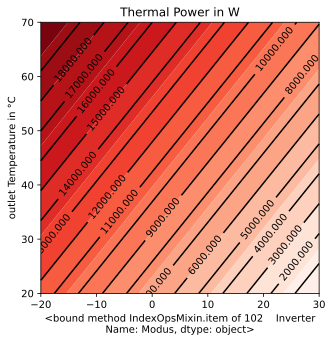

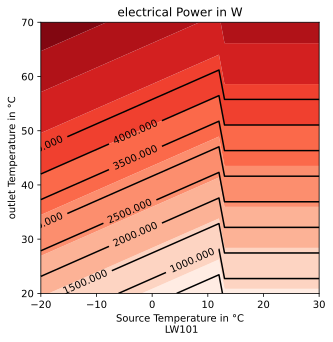

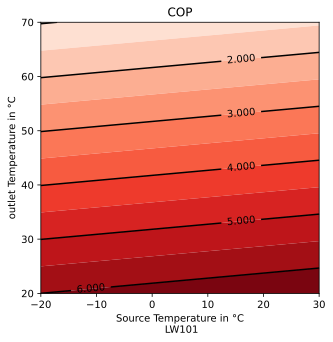

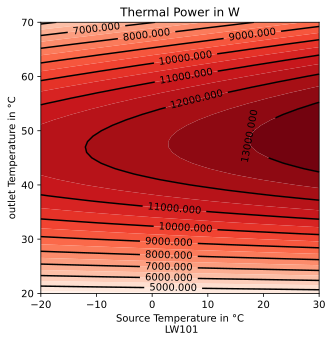

In [4]:
for model in Models:
    if model!='SWCV 162(H)(K)3':
        continue
    else:
        onemodel = paradf.loc[paradf['Model'] == model]
        value1 = onemodel['k1'].to_numpy()
        value2 = onemodel['k2'].to_numpy()
        value3 = onemodel['k3'].to_numpy()
        modus = onemodel['Modus'].item
        Tin=[]
        Tout=[]
        Pth=[]
        T_low=[*range(-20,31,1)]
        T_high=[*range(20,71,1)]
        for element1 in T_low:
            for element2 in T_high:
                p_th = element1*value1[0] + element2 *value2[0] + value3[0]
                Tin.append(element1)
                Tout.append(element2)
                Pth.append(p_th)
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(1000,20000,1000)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('Thermal Power in W')
        ax.set_xlabel(modus)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()
        value1 = onemodel['k4'].to_numpy()
        value2 = onemodel['k5'].to_numpy()
        value3 = onemodel['k6'].to_numpy()
        modus = onemodel['Modus'].item
        Tin=[]
        Tout=[]
        Pth=[]
        T_low=[*range(-20,31,1)]
        T_high=[*range(20,71,1)]
        for element1 in T_low:
            for element2 in T_high:
                if element1<=12:
                    p_th = element1*value1[0] + element2 *value2[0] + value3[0]
                else:
                    value1[0]=0
                    p_th = element1*value1[0] + element2 *value2[0] + value3[0]
                    value1 = onemodel['k4'].to_numpy()
                Tin.append(element1)
                Tout.append(element2)
                Pth.append(p_th)
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(0000,5000,500)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('electrical Power in W')
        ax.set_xlabel('Source Temperature in °C\n LW101')
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()
        value1 = onemodel['k7'].to_numpy()
        value2 = onemodel['k8'].to_numpy()
        value3 = onemodel['k9'].to_numpy()
        modus = onemodel['Modus'].item
        Tin=[]
        Tout=[]
        Pth=[]
        T_low=[*range(-20,31,1)]
        T_high=[*range(20,71,1)]
        for element1 in T_low:
            for element2 in T_high:
                p_th = element1*value1[0] + element2 *value2[0] + value3[0]
                Tin.append(element1)
                Tout.append(element2)
                Pth.append(p_th)
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(0,10,1)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('COP')
        ax.set_xlabel('Source Temperature in °C\n LW101')
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()
        k1 = onemodel['k1'].to_numpy()[0]
        k2 = onemodel['k2'].to_numpy()[0]
        k3 = onemodel['k3'].to_numpy()[0]
        k4 = onemodel['k4'].to_numpy()[0]
        k5 = onemodel['k5'].to_numpy()[0]
        k6 = onemodel['k6'].to_numpy()[0]
        k7 = onemodel['k7'].to_numpy()[0]
        k8 = onemodel['k8'].to_numpy()[0]
        k9 = onemodel['k9'].to_numpy()[0]
        modus = onemodel['Modus'].item
        Tin=[]
        Tout=[]
        Pth=[]
        T_low=[*range(-20,31,1)]
        T_high=[*range(20,71,1)]
        for x in T_low:
            for y in T_high:
                if x<=12:
                    p_th = k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y
                else:
                    k4=0
                    p_th = k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y
                    k4 = onemodel['k4'].to_numpy()[0]
                Tin.append(x)
                Tout.append(y)
                Pth.append(p_th)
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(1000,20000,1000)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('Thermal Power in W')
        ax.set_xlabel('Source Temperature in °C\n LW101')
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()


In [8]:
#data_keymark=data_keymark.merge(paradf, how='inner', on='Model')
data_key = pd.read_csv('hplib-database_heating.csv', delimiter=',')
data_key.loc[data_key['Model']== 'LW 101']

,Manufacturer,Model,Date,Type,SPL indoor [dBA],SPL outdoor [dBA],Refrigerant,Mass of Refrigerant [kg],PSB [W],Prated [W],Guideline,Climate,T_in [°C],T_out [°C],P_th [W],COP,P_el [W]
488,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.90,EN 14825,average,-7,34,7530,2.97,2535
489,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.35,EN 14825,average,-7,52,6980,2.03,3438
490,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.90,EN 14825,average,2,30,9540,3.78,2524
491,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.35,EN 14825,average,2,42,9410,3.11,3026
492,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.90,EN 14825,average,7,27,10430,4.69,2224
493,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.35,EN 14825,average,7,36,10400,4.04,2574
494,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.90,EN 14825,average,12,24,12190,5.15,2367
495,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.35,EN 14825,average,12,30,12170,5.02,2424
496,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,58.0,NaN,R407c,4.8,10,11.53,EN 14825,warm,2,35,9500,3.56,2669
497,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,58.0,NaN,R407c,4.8,10,11.30,EN 14825,warm,2,55,9230,2.52,3663


In [6]:
paradf.to_csv('para.csv', encoding='utf-8', index=False)

In [7]:
paradf = pd.read_csv('para.csv', delimiter=',')
#print(paradf.loc[paradf['Model']=='LW 101'])
paradf.loc[paradf['Model']=='SWCV 162(H)(K)3']


,Model,k1,k2,k3,k4,k5,k6,k7,k8,k9,Modus
102,SWCV 162(H)(K)3,-231.238208,181.299819,3312.171815,-47.85721,105.933085,-1408.039717,0.009377,-0.100567,8.199801,Inverter


In [39]:
new_df = pd.read_csv('hplib-database_heating.csv', delimiter=',')
new_df = new_df.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
new_df=new_df.loc[new_df['Model']== 'SWCV 162(H)(K)3']
# calculate COP and quality grade (eta)
K = 273.15
new_df['COP'] = new_df['P_th'] / new_df['P_el']
eta_carnot_key = (new_df['T_out']+K) / ((new_df['T_out']+K)-(new_df['T_in']+K))
new_df['eta'] = new_df ['COP'] / eta_carnot_key
new_df.fillna(0, inplace=True)

#adding another support point at T_in=20
df2 = pd.read_csv('hplib-database_heating.csv', delimiter=',')
df2 = df2.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
df2=df2.loc[df2['Model']== 'SWCV 162(H)(K)3']
df2=df2.loc[df2['T_in']==12]
df2.loc[df2['T_in']==12,['T_in']]=20
K = 273.15
df2['COP'] = df2['P_th'] / df2['P_el']
eta_carnot_key = (df2['T_out']+K) / ((df2['T_out']+K)-(df2['T_in']+K))
df2['eta'] = df2 ['COP'] / eta_carnot_key
df2.fillna(0, inplace=True)
new_df1=pd.concat([new_df,df2])
#adding another support point at T_in=25
df3 = pd.read_csv('hplib-database_heating.csv', delimiter=',')
df3 = df3.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
df3=df3.loc[df3['Model']== 'SWCV 162(H)(K)3']
df3=df3.loc[df3['T_in']==12]
df3.loc[df3['T_in']==12,['T_in']]=25
K = 273.15
df3['COP'] = df3['P_th'] / df3['P_el']
eta_carnot_key = (df3['T_out']+K) / ((df3['T_out']+K)-(df3['T_in']+K))
df3['eta'] = df3 ['COP'] / eta_carnot_key
df3.fillna(0, inplace=True)
new_df2=pd.concat([new_df1,df3])
new_df2

,Manufacturer,Model,Date,Type,SPL indoor [dBA],SPL outdoor [dBA],Refrigerant,Mass of Refrigerant [kg],PSB [W],Prated [W],Guideline,Climate,T_in,T_out,P_th,COP,P_el,eta
1608,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,15.9,EN 14825,average,-7,34,14200,4.190027,3389,0.559307
1609,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,16.0,EN 14825,average,-7,52,14200,3.000211,4733,0.544402
1610,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,15.9,EN 14825,average,2,30,8700,5.259976,1654,0.485830
1611,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,16.0,EN 14825,average,2,42,8700,4.099906,2122,0.520375
1612,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,15.9,EN 14825,average,7,27,5700,6.057386,941,0.403624
1613,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,16.0,EN 14825,average,7,36,5600,4.899388,1143,0.459590
1614,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,15.9,EN 14825,average,12,24,5800,5.882353,986,0.237551
1615,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,16.0,EN 14825,average,12,30,5500,5.000000,1100,0.296883
1616,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,15.9,EN 14825,warm,2,35,15900,3.890384,4087,0.416624
1617,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,16.0,EN 14825,warm,2,55,15400,2.800000,5500,0.452232


In [43]:
k7_SWCV=paradf.loc[paradf['Model']=='SWCV 162(H)(K)3','k7'].array[0]
k8_SWCV=paradf.loc[paradf['Model']=='SWCV 162(H)(K)3','k8'].array[0]
k9_SWCV=paradf.loc[paradf['Model']=='SWCV 162(H)(K)3','k9'].array[0]
new_df2['fittet_COP']=new_df2['T_in']*k7_SWCV+new_df2['T_out']*k8_SWCV+k9_SWCV
new_df2.to_csv('keymark.csv')

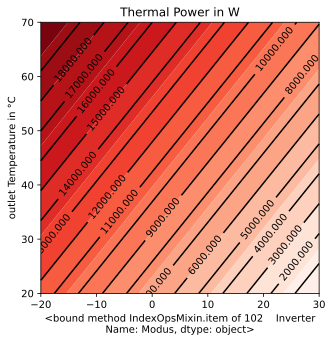

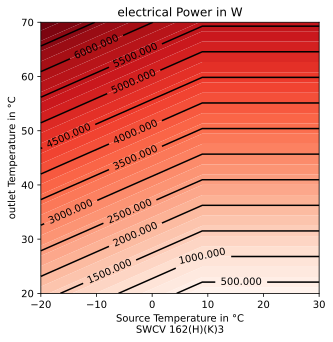

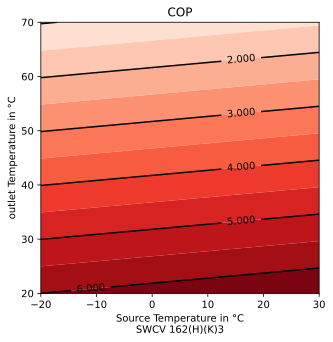

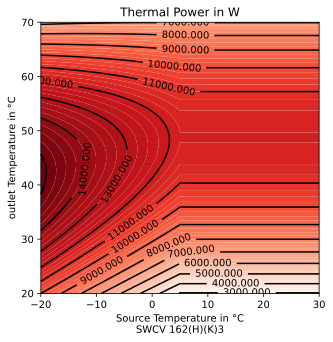

In [16]:
for model in Models:
    if model!='SWCV 162(H)(K)3':#define wich model to plot:  'LW 101' for on off 
                                                #   'SWCV 162(H)(K)3'; 'WPE-I 33H 400 Premium' for Inverter
                                                #   'LW 180A' ; 
        continue
    else:
        #reading parameters
        onemodel = paradf.loc[paradf['Model'] == model]
        k1 = onemodel['k1'].to_numpy()[0]#T_in for Pth
        k2 = onemodel['k2'].to_numpy()[0]#T_out for Pth
        k3 = onemodel['k3'].to_numpy()[0]#constant for Pth
        k4 = onemodel['k4'].to_numpy()[0]#T_in for Pel
        k5 = onemodel['k5'].to_numpy()[0]#T_out for Pel
        k6 = onemodel['k6'].to_numpy()[0]#constant for Pel
        k7 = onemodel['k7'].to_numpy()[0]#T_in for COP
        k8 = onemodel['k8'].to_numpy()[0]#T_in for COP
        k9 = onemodel['k9'].to_numpy()[0]#constant for COP
        modus = onemodel['Modus'].item
        T_low=[*range(-20,31,1)]#inflow TEMP
        T_high=[*range(20,71,1)]#outflow TEMP
        Tin=[]
        Tout=[]
        Pth_keyfit=[]

        for x in T_low:
            for y in T_high:
                p_th_keyfit = k1*x + k2*y + k3#formula for Pth
                Tin.append(x)
                Tout.append(y)
                Pth_keyfit.append(p_th_keyfit)
        #create Dataframe for plotting        
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth_keyfit
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(1000,20000,1000)])

        # Generate a color mapping of the levels we've specified
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('Thermal Power in W')
        ax.set_xlabel(modus)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()


        # KEYMARK fit from P_el
        #Pel(x,y)=k4*x+k5*y+k6
        Tin=[]
        Tout=[]
        Pel_keyfit=[]
        for x in T_low:
            for y in T_high:
                pel_12=k5*y+k6 # pel @ 12 °C -> k4 = 0, so the minimum electric Power of inverter Heatpump is reached.
                #if pel_12>(k4*x + k5*y + k6): #define minimum value of electric Power
                if x>9: #7-11
                    p_el = 9*k4+k5*y+k6
                else:
                    #otherwise use the normal formula of the fit
                    p_el = k4*x + k5*y + k6 
                Tin.append(x)
                Tout.append(y)
                Pel_keyfit.append(p_el)
        #Create dataframe for plotting
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pel']=Pel_keyfit
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pel').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(0000,20000,500)])

        # Generate a color mapping of the levels we've specified
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('electrical Power in W')
        ax.set_xlabel('Source Temperature in °C\n'+ model)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()
       
        #COP Keyfit:
        #COP(x,y)=k7*x+k8*y+k9
        Tin=[]
        Tout=[]
        COP_keyfit=[]
        for x in T_low:
            for y in T_high:
                #calculate COP from the fit parameters
                cop = k7*x + k8*y + k9
                Tin.append(x)
                Tout.append(y)
                COP_keyfit.append(cop)
        #Create Dataframe for plotting
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['COP']=COP_keyfit
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='COP').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(0,10,1)])

        # Generate a color mapping of the levels we've specified
        
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('COP')
        ax.set_xlabel('Source Temperature in °C\n'+ model)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()

        #Pth from parameters of COP and Pel
        # Pth(x,y)=Pel(x,y)*COP(x,y)
        # Pth(x,y)=k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y
        Tin=[]
        Tout=[]
        Pth=[]
        for x in T_low:
            for y in T_high:
                p_th_12=k5*k7*x*y+k6*k7*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y #value if k4=0 see electric Power for more details
                pel_12=k5*y+k6 # pel @ 12 °C -> k4 = 0, so the minimum electric Power of inverter Heatpump is reached.
                #if pel_12>(k4*x + k5*y + k6):
                if x>5: #4-7°C
                    p_th = k4*k7*5*5+(k4*k8+k5*k7)*5*y+(k4*k9+k6*k7)*5+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y
                else:
                    p_th = k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y #normal formula of the fit
                Tin.append(x)
                Tout.append(y)
                Pth.append(p_th)
        #Create DataFrame for plotting
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(1000,60000,1000)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('Thermal Power in W')
        ax.set_xlabel('Source Temperature in °C\n' + model)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()


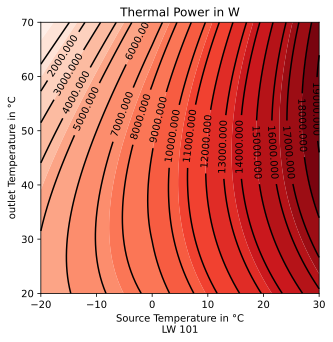

In [5]:
for model in Models:
    if model!='LW 101':#define wich model to plot
        continue
    else:
        #reading parameters
        onemodel = paradf.loc[paradf['Model'] == model]
        k1 = onemodel['k1'].to_numpy()[0]#T_in for Pth
        k2 = onemodel['k2'].to_numpy()[0]#T_out for Pth
        k3 = onemodel['k3'].to_numpy()[0]#constant for Pth
        k4 = onemodel['k4'].to_numpy()[0]#T_in for Pel
        k5 = onemodel['k5'].to_numpy()[0]#T_out for Pel
        k6 = onemodel['k6'].to_numpy()[0]#constant for Pel
        k7 = onemodel['k7'].to_numpy()[0]#T_in for COP
        k8 = onemodel['k8'].to_numpy()[0]#T_in for COP
        k9 = onemodel['k9'].to_numpy()[0]#constant for COP
        modus = onemodel['Modus'].item
        T_low=[*range(-20,31,1)]#inflow TEMP
        T_high=[*range(20,71,1)]#outflow TEMP
        #Pth from parameters of COP and Pel
        # Pth(x,y)=Pel(x,y)*COP(x,y)
        # Pth(x,y)=k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y
        Tin=[]
        Tout=[]
        Pth=[]
        for x in T_low:
            for y in T_high:
                p_th_12=k5*k7*x*y+k6*k7*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y #value if k4=0 see electric Power for more details
                pel_12=k5*y+k6 # pel @ 12 °C -> k4 = 0, so the minimum electric Power of inverter Heatpump is reached.
                if pel_12>(k4*x + k5*y + k6):
                    p_th = p_th_12
                else:
                    p_th = k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y #normal formula of the fit
                Tin.append(x)
                Tout.append(y)
                Pth.append(p_th)
        #Create DataFrame for plotting
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(1000,20000,1000)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('Thermal Power in W')
        ax.set_xlabel('Source Temperature in °C\n' + model)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()
